In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(0)

In [3]:
# Dogs: higher ear flappiness index, lower whisker length
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=100)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=100)

In [4]:
# Cats: lower ear flappiness index, higher whisker length
cats_whisker_length = np.random.normal(loc=8, scale=1, size=100)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=100)


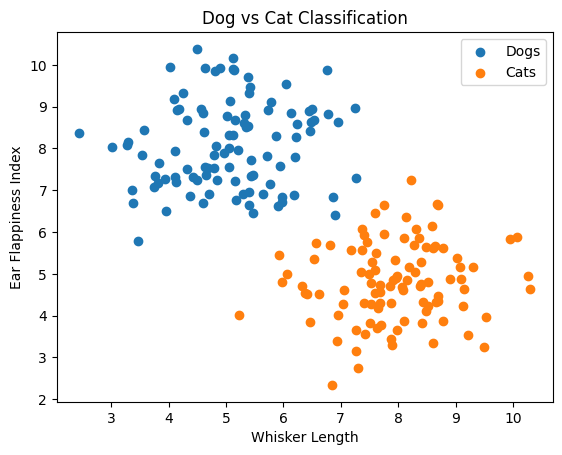

In [5]:
# Plot the data points
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification')
plt.legend()
plt.show()

In [6]:
  # Implementing random linear classifier algorithm
def random_linear_classifier(data_dogs, data_cats, k, d):
      # d is the number of features
      best_error = float('inf')
      best_theta = None
      best_theta0 = None
      
      for _ in range(k):
          theta = np.random.normal(size=d)
          theta0 = np.random.normal()
          
          error = compute_error(data_dogs, data_cats, theta, theta0)
          
          if error < best_error:
              best_error = error
              best_theta = theta
              best_theta0 = theta0
      
      return best_theta, best_theta0

In [7]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1
    return error

In [8]:
# Prepare data for algorithm
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T

In [9]:
# Run random linear classifier algorithm
k = 200  # Number of iterations
d = 2  # Number of features
best_theta, best_theta0 = random_linear_classifier(dogs_data, cats_data, k, d)


In [10]:
# Plot the decision boundary
x_vals = np.linspace(2, 10, 100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0 / best_theta[1])

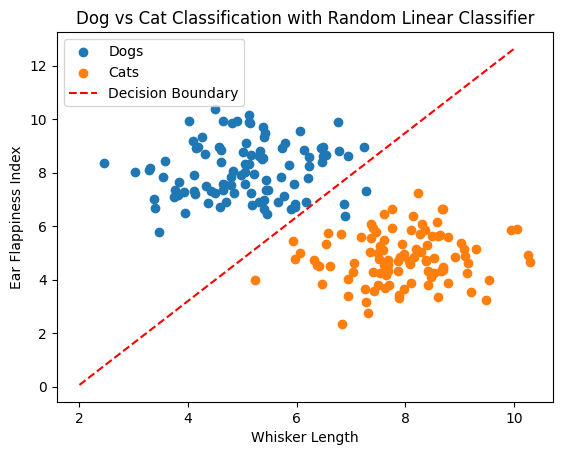

In [12]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classifier')
plt.legend()
plt.show()